# Predicting online advertising click rates
+ Logistic regression
- Ridge logistic regression
- Lasso logistic regression

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import datetime
from datetime import datetime
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
%matplotlib inline
sns.set_style('white')

In [2]:
df = pd.read_csv("Datasets/advertising clicks.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.isnull().values.any()

False

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Daily Internet Usage')

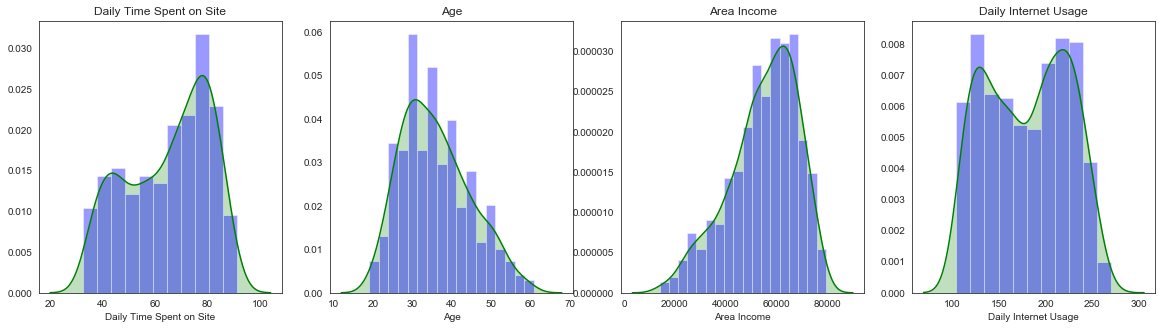

In [5]:
# Normality

fig = plt.figure(figsize=(20,5))

fig.add_subplot(141)
sns.distplot(df['Daily Time Spent on Site'], hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Daily Time Spent on Site')

fig.add_subplot(142)
sns.distplot(df['Age'], hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Age')

fig.add_subplot(143)
sns.distplot(df['Area Income'], hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Area Income')

fig.add_subplot(144)
sns.distplot(df['Daily Internet Usage'], hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Daily Internet Usage')

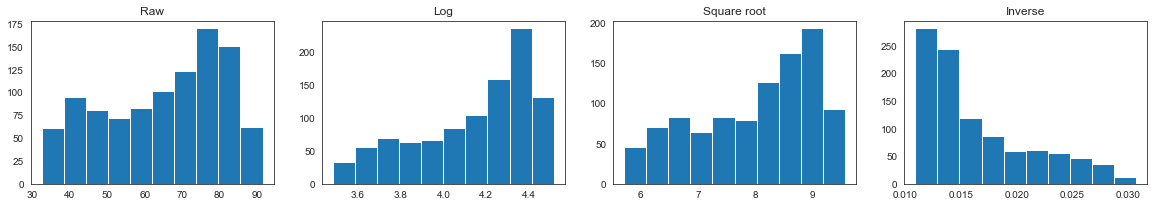

In [6]:
# Normalizing 'Daily Time Spent on Site'

fig = plt.figure(figsize=(20,3))

fig.add_subplot(141)
plt.hist(df['Daily Time Spent on Site'].dropna())
plt.title('Raw')

fig.add_subplot(142)
plt.hist(np.log(df['Daily Time Spent on Site'].dropna()))
plt.title('Log')

fig.add_subplot(143)
plt.hist(np.sqrt(df['Daily Time Spent on Site'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(144)
plt.hist(1/df['Daily Time Spent on Site'].dropna())
plt.title('Inverse')
plt.show()

# The square root transformation, while skewed left, is closest to normal.

df['Daily Time Spent on Site_sqrt'] = np.sqrt(df['Daily Time Spent on Site'])

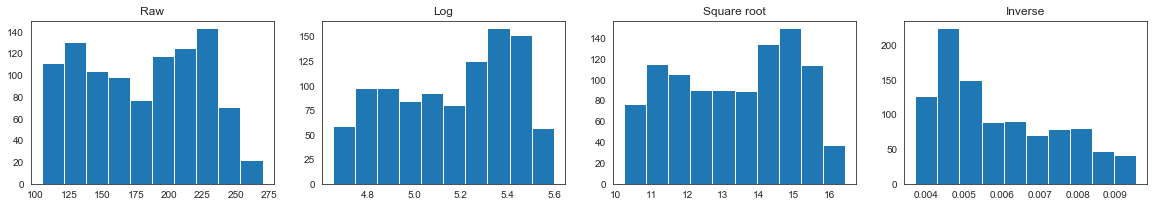

In [7]:
# Normalizing 'Daily Internet Usage'

fig = plt.figure(figsize=(20,3))

fig.add_subplot(141)
plt.hist(df['Daily Internet Usage'].dropna())
plt.title('Raw')

fig.add_subplot(142)
plt.hist(np.log(df['Daily Internet Usage'].dropna()))
plt.title('Log')

fig.add_subplot(143)
plt.hist(np.sqrt(df['Daily Internet Usage'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(144)
plt.hist(1/df['Daily Internet Usage'].dropna())
plt.title('Inverse')
plt.show()

# The log transformation, while skewed right, is closest to normal.

df['Daily Internet Usage_log'] = np.log(df['Daily Internet Usage'])

In [8]:
df.isnull().values.any()

False

In [9]:
# Creating the features dataframe

features = df.iloc[:,1:3]
features['Daily Time Spent on Site_sqrt'] = df['Daily Time Spent on Site']
features['Daily Internet Usage_log'] = df['Daily Internet Usage_log']
features['Male'] = df['Male']

In [10]:
# Features from Timestamp

hour = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ).hour
features['Hour'] = df['Timestamp'].map(hour)

day = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ).day
features['Day'] = df['Timestamp'].map(day)

month = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ).month
features['Month'] = df['Timestamp'].map(month)

features.head()

,Age,Area Income,Daily Time Spent on Site_sqrt,Daily Internet Usage_log,Male,Hour,Day,Month
0,35,61833.90,68.95,5.545529,0,0,27,3
1,31,68441.85,80.23,5.266672,1,1,4,4
2,26,59785.94,69.47,5.465948,0,20,13,3
3,29,54806.18,74.15,5.504884,1,2,10,1
4,35,73889.99,68.37,5.418675,0,3,3,6


Text(0.5, 1.0, 'Daily Internet Usage_log')

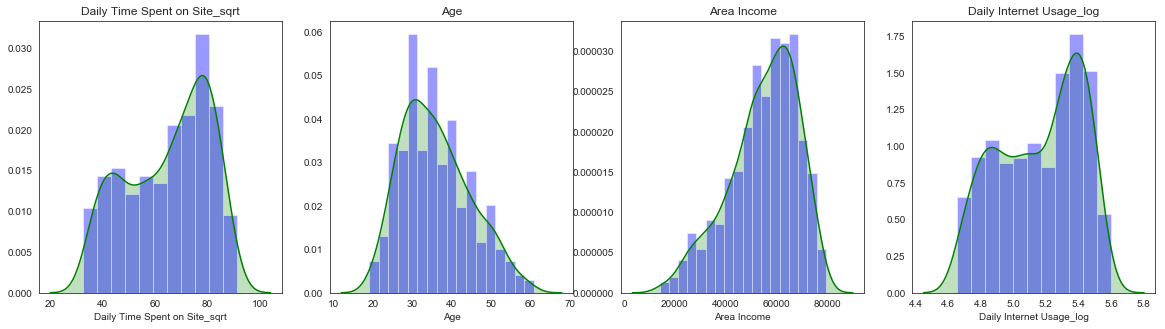

In [11]:
# Normality

fig = plt.figure(figsize=(20,5))

fig.add_subplot(141)
sns.distplot(features['Daily Time Spent on Site_sqrt'], hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Daily Time Spent on Site_sqrt')

fig.add_subplot(142)
sns.distplot(features['Age'], hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Age')

fig.add_subplot(143)
sns.distplot(features['Area Income'], hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Area Income')

fig.add_subplot(144)
sns.distplot(features['Daily Internet Usage_log'], hist=True, color='b', kde_kws={'shade':True,'color':'g'})
plt.title('Daily Internet Usage_log')

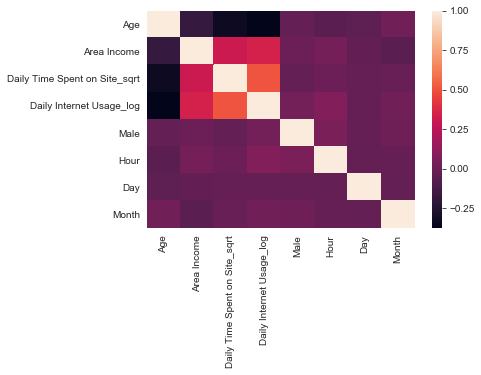

In [12]:
# Multicollinearity

sns.heatmap(features.corr())

# Logistic regression

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in long_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


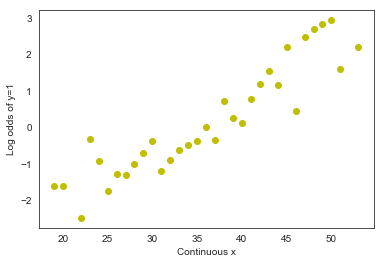

In [13]:
# Converting binary values into the odds of getting y=1

# Continuous predictor
x = features['Age']

# Binary outcome.
bin_y = df['Clicked on Ad']

# Unique values in x.
xvals = x.unique()

# Calculate and store the odds.
yodds = []
for xi in xvals: 
    y1_ct = bin_y[x == xi].sum()  # The number of trials y = 1.
    y0_ct = len(bin_y[x == xi]) - y1_ct  # The number of trials y = 0.
    yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    
# Natural log of the odds.
ln_yodds = np.log(yodds)

# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, ln_yodds, 1)

# Works as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display.
plt.plot(xvals, ln_yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Log odds of y=1')

plt.show()

In [14]:
ln_yodds

array([-0.36290549, -1.18958407, -1.28785429, -0.69314718, -0.31845373,
       -0.62415431,  2.7080502 , -0.36290549, -1.60943791,  2.83321334,
       -0.33647224, -0.91629073,  0.78845736,  0.        ,  0.11122564,
               inf, -0.9903987 , -0.47000363, -2.48490665,         inf,
        2.19722458,  0.26826399,  0.45198512, -0.89794159, -1.74919985,
        1.55814462,  2.19722458,  2.94443898,  2.48490665, -1.31218639,
        1.2039728 ,  0.73396918,         inf,        -inf,         inf,
               inf,  1.16315081,         inf,         inf,  1.60943791,
       -1.60943791,         inf,         inf])

In [15]:
# Declare predictors.
X_statsmod = features[['Age', 'Area Income', 'Daily Time Spent on Site_sqrt', 'Daily Internet Usage_log',
              'Male', 'Hour', 'Day', 'Month']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(df['Clicked on Ad'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.087770
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Wed, 02 Jan 2019   Pseudo R-squ.:                  0.8734
Time:                        22:40:26   Log-Likelihood:                -87.770
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.551e-256
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Age                               0.1625      0.026      6.314      0

In [16]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(df['Clicked on Ad'], pred_y_statsmod)

print('\n Accuracy by click success')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by click success
col_0            0    1
Clicked on Ad          
0              489   11
1               20  480

 Percentage accuracy
0.969


In [17]:
# Logistic regression classifier (SKLearn)
# Parameter regularization coefficient C.

lr = LogisticRegression(C=1e10)
X = features[['Age', 'Area Income', 'Daily Time Spent on Site_sqrt', 'Daily Internet Usage_log',
              'Male', 'Hour', 'Day', 'Month']]
y = df['Clicked on Ad']

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ 2.27050414e-01 -4.59769008e-05 -1.08438313e-01  9.23330576e-02
  -6.04111921e-03  3.22109208e-02  3.20347200e-02  9.53470356e-02]]
[0.03333263]

 Accuracy by admission status
Clicked on Ad    0    1
row_0                  
0              467   73
1               33  427

 Percentage accuracy
0.894


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Ridge logistic regression

In [18]:
X_train = features[['Age', 'Area Income', 'Daily Time Spent on Site_sqrt', 'Daily Internet Usage_log',
              'Male', 'Hour', 'Day', 'Month']]
Y_train = df['Clicked on Ad']

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. 

# By convention, the intercept is not regularized.
# We did not standardize the data so the intercept is not equal to zero and cannot be dropped.

ridgeregr = linear_model.Ridge(alpha=5)
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

0.8232104651753415
0.009161978920063936


# Lasso logistic regression

In [19]:
lass = linear_model.Lasso(alpha=.4)
lassfit = lass.fit(X_train, Y_train)
print('R²:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates:')
print(origparams)

R²:
0.6724176543010172

Parameter estimates:
[ 9.49949749e-03 -1.01555504e-05 -1.75959572e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.86022861e+00]
